## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
mouse_metadata.head()

In [3]:
mouse_metadata.shape

In [4]:
study_results.head()

In [5]:
study_results.shape


In [6]:
# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mouse
combined_data["Mouse ID"].nunique()

249

In [8]:
num_mouse_ID = combined_data["Mouse ID"].value_counts()
num_mouse_ID

g989    13
z578    10
d251    10
u327    10
j989    10
        ..
n482     1
b447     1
t573     1
f932     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
grouped_ID = combined_data.groupby(["Mouse ID"])
dup_ID = grouped_ID["Timepoint"].value_counts()
dup_ID_df = dup_ID.to_frame()
dup_ID_df

Timepoint
Mouse ID Timepoint           
a203     0                  1
         5                  1
         10                 1
         15                 1
         20                 1
...                       ...
z969     25                 1
         30                 1
         35                 1
         40                 1
         45                 1

[1888 rows x 1 columns]

In [10]:
dup_ID_df = dup_ID_df.loc[dup_ID_df["Timepoint"]>1]

dup_ID_df

Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicated_df =combined_data.loc[combined_data["Mouse ID"] == "g989"]

duplicated_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
duplicated_df.shape

(13, 8)

In [13]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Checking the number of mice in the clean DataFrame.
new_num_mouse_ID = clean_df["Mouse ID"].value_counts()
new_num_mouse_ID

r944    10
l661    10
a203    10
s185    10
b742    10
        ..
b447     1
t573     1
f932     1
u153     1
h428     1
Name: Mouse ID, Length: 248, dtype: int64

In [15]:
num_mouse_ID
#One mouse ID is removed by clearing the data. 


g989    13
z578    10
d251    10
u327    10
j989    10
        ..
n482     1
b447     1
t573     1
f932     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

## Summary Statistics

In [16]:
clean_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [17]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume 

In [18]:
mean = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).mean()
median = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).median()
var = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).var()
std = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).std()
sem = clean_df["Tumor Volume (mm3)"].groupby(clean_df["Drug Regimen"]).sem()

#Create dataframe
summary_df = pd.DataFrame({"Mean":mean, "Median": median, "Variance":var, "Standard Deviation": std, "Standart Error":sem})
summary_df

,Mean,Median,Variance,Standard Deviation,Standart Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen 
grouped_by_drug = clean_df.groupby(["Drug Regimen"])
grouped_by_drug.count()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


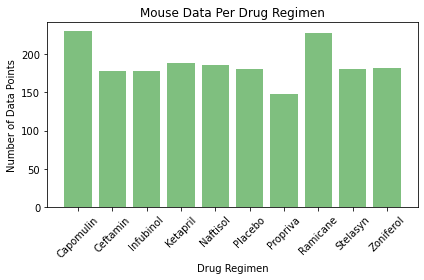

In [30]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

#Define x axis of the bar chart
x_axis = np.arange(len(grouped_by_drug))

#y axis of the bar chart
num_mouse = grouped_by_drug["Mouse ID"].count()
num_mouse_df = num_mouse.to_frame()
y_axis = num_mouse_df["Mouse ID"]

#Plot bar graph
plt.bar(x_axis, y_axis, align="center", color='g', alpha=0.5 )

#tick mark management
tick_locations = [value for value in x_axis]

ticks = ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane","Stelasyn","Zoniferol"]

plt.xticks(tick_locations, ticks, rotation = 45)

plt.title("Mouse Data Per Drug Regimen")

plt.xlabel("Drug Regimen")

plt.ylabel("Number of Mice")

plt.tight_layout()

plt.show()

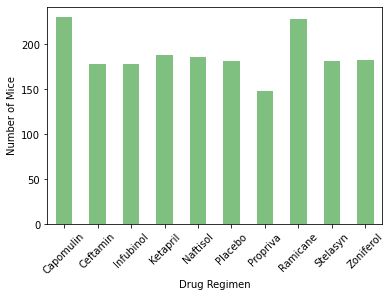

In [47]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
num_mouse.plot.bar(color= "green", alpha = 0.5, align = "center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation = 45)
plt.show()

In [37]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
count_gender = clean_df["Sex"].value_counts()
count_gender_df= count_gender.to_frame()
count_gender_df


,Sex
Male,958
Female,922


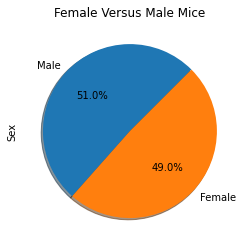

In [53]:

count_gender.plot(kind="pie", title="Female Versus Male Mice", shadow= True, startangle = 45, autopct = "%1.1f%%")
plt.show()

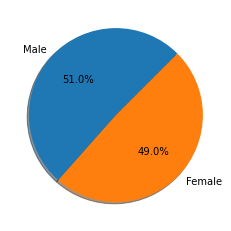

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels= ["Male", "Female"]
plt.pie(count_gender, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45)
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
